<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [15]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**1. Загрузить датасет**

In [3]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [6]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [7]:
dataset.Class.unique()

array([0, 1], dtype=int64)

In [8]:
print('Колличество сделок по классам:\n', dataset.Class.value_counts())

Колличество сделок по классам:
 0    284315
1       492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Количество сделок по классам')

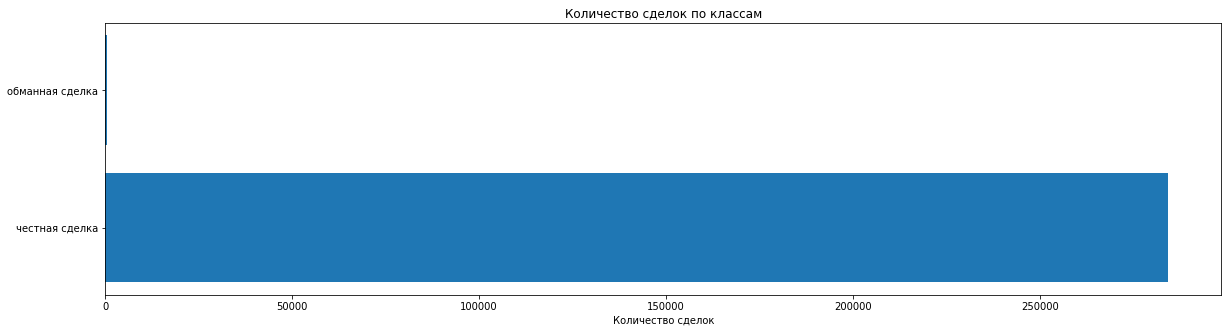

In [9]:
plt.figure(figsize=(20,5))
plt.barh(['честная сделка','обманная сделка'], dataset.Class.value_counts())
plt.xlabel('Количество сделок')
plt.title('Количество сделок по классам')

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [10]:
# 1 for fraudulent transactions, 0 otherwise
df_fraud = dataset[dataset.Class == 1]['Amount']
df_normal = dataset[dataset.Class == 0]['Amount']

In [11]:
print('Было использовано денег:')
print(f'- в обманных операциях:   {df_fraud.sum():>12}')
print(f'- в нормальных операциях: {df_normal.sum():>12}')

Было использовано денег:
- в обманных операциях:       60127.97
- в нормальных операциях:  25102462.04


Text(0.5, 0, 'Сумма')

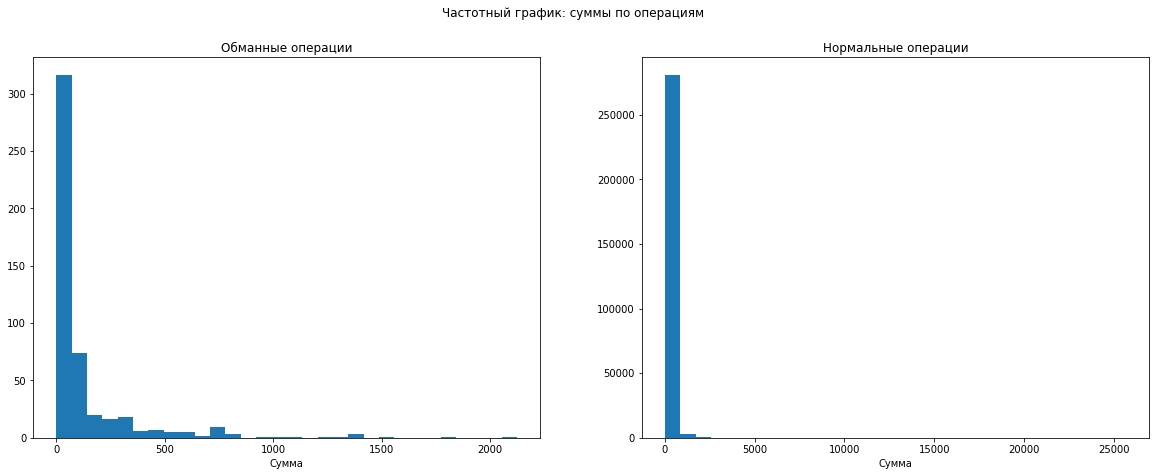

In [12]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize=(20, 7))
axs1.hist(df_fraud,bins=30)
axs2.hist(df_normal,bins=30)

fig.suptitle('Частотный график: суммы по операциям')
axs1.set_title('Обманные операции')
axs2.set_title('Нормальные операции')
axs1.set_xlabel('Сумма')
axs2.set_xlabel('Сумма')

**5. Построить графики histograms для всех значений**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD555899C8>,
      dtype=object)

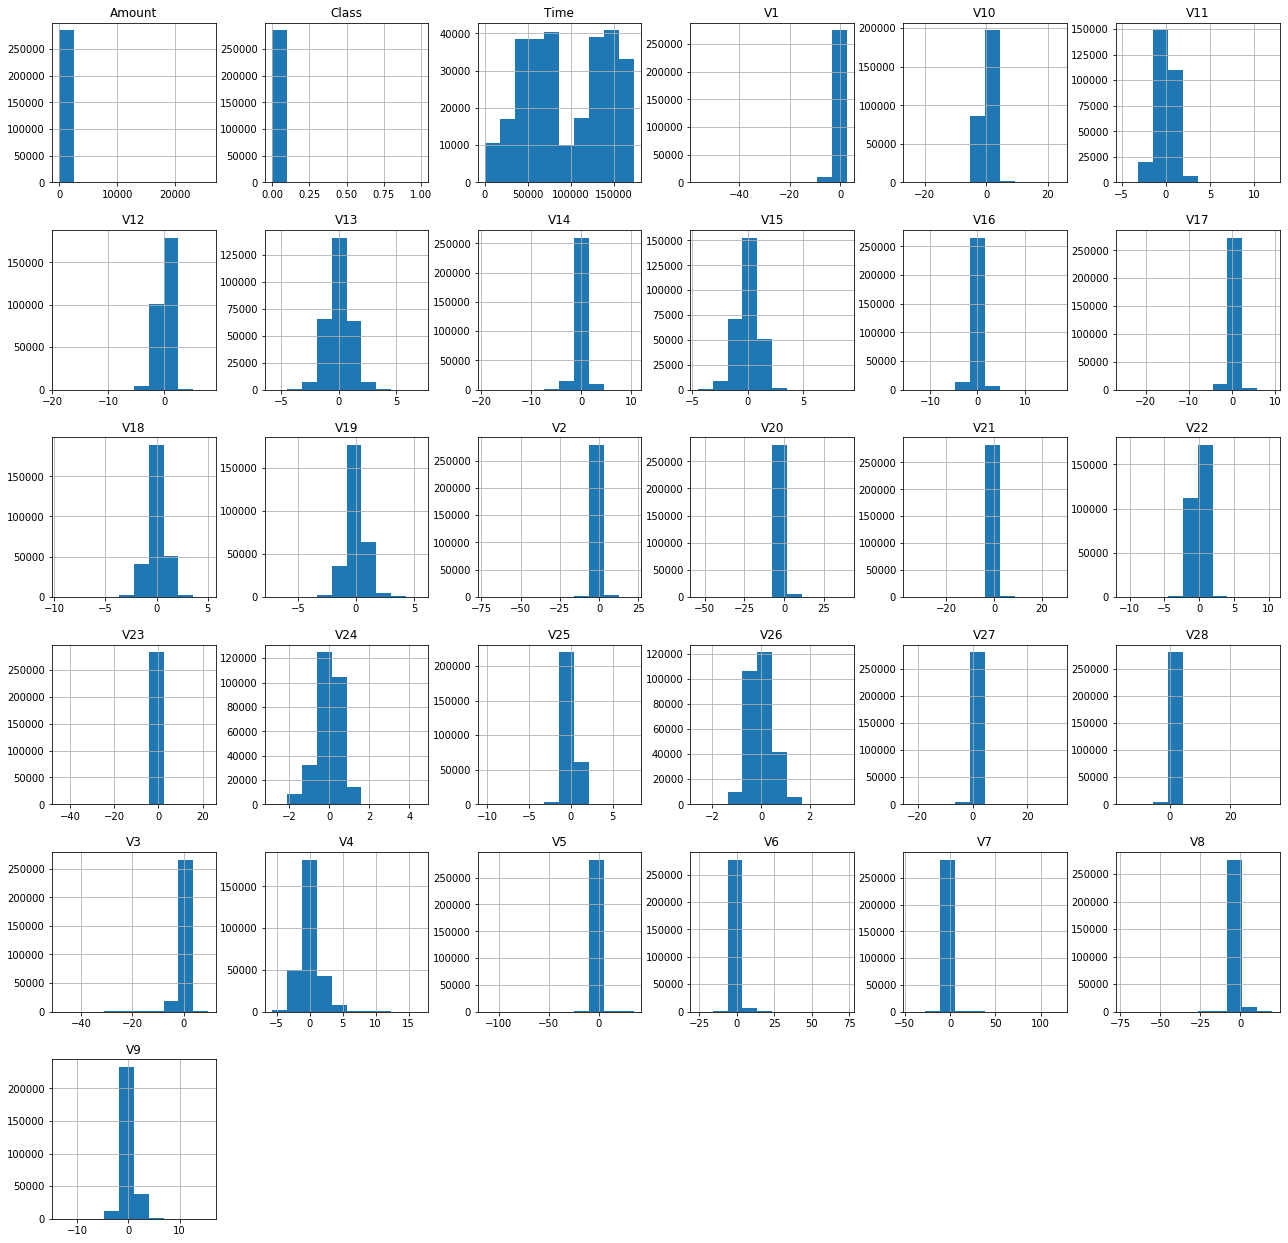

In [13]:
dataset.hist(figsize=(22,22))

**6. Построить матрицу корреляций для всех значений**

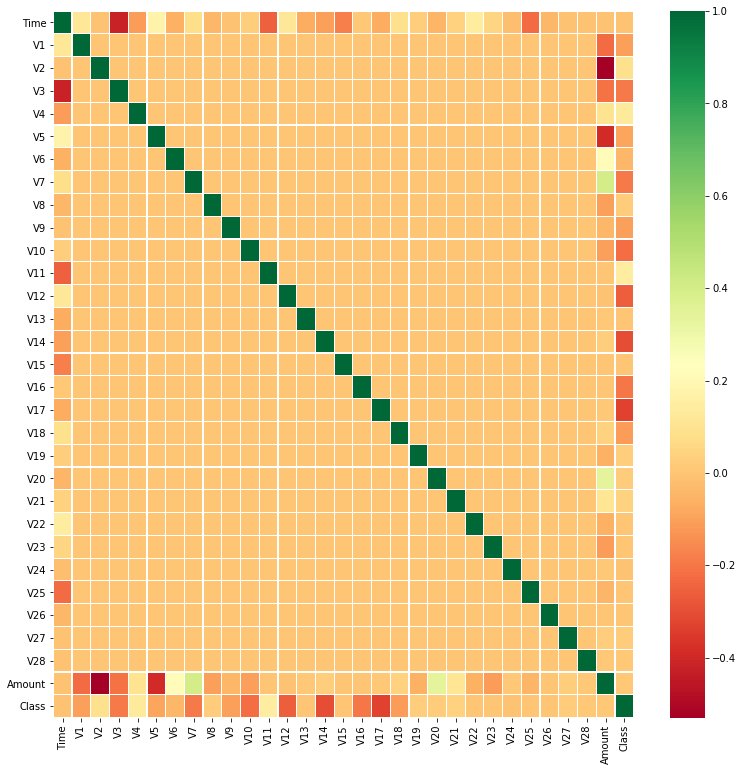

In [16]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

Сильных корреляций в данных нет. Наибольшие: Amount-V2, Time-V3, Amount-V7.

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель Random Forest

In [ ]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

In [18]:
input_x = dataset.iloc[:,1:29] # данные для предсказания классов
output_y = dataset.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

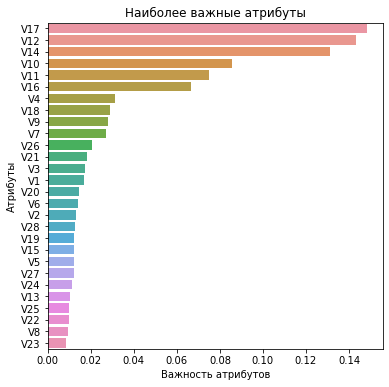

In [20]:
# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# plt.legend()
plt.show()

In [21]:
# Посчитаем качество модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" дала точность предсказания порядка {model.score(x_test, y_test)}.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.96      0.77      0.85       138

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Модель "рандомных деревьев" дала точность предсказания порядка 0.9995786664794073.


**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [23]:
# нормализация
df = dataset.iloc[:,1:29] # данные для предсказания классов


headers = list(df.columns.values)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
# df_norm.head()
df_norm.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.916588,0.534517,0.674827,-0.496140,0.531433,-0.473960,-0.469289,0.570771,-0.074440,0.017444,...,0.126630,0.160531,0.122959,0.020062,0.330867,-0.235532,0.155813,-0.149103,-0.166978,-0.373752
std,0.066552,0.034847,0.052549,0.125529,0.018584,0.026790,0.015073,0.025623,0.075692,0.045056,...,0.127139,0.016417,0.023682,0.067708,0.018548,0.163221,0.058521,0.157542,0.014900,0.013397
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.885316,0.521886,0.643970,-0.571379,0.522121,-0.489409,-0.476040,0.566295,-0.118747,-0.004712,...,0.055364,0.156022,0.115595,-0.030539,0.326060,-0.331092,0.120209,-0.255928,-0.169593,-0.375902
50%,0.917203,0.535899,0.681060,-0.497899,0.530701,-0.479474,-0.468800,0.571251,-0.077983,0.013599,...,0.127213,0.159200,0.122010,0.020695,0.330535,-0.224489,0.157676,-0.166137,-0.166929,-0.373296
75%,0.961290,0.551478,0.710427,-0.430236,0.539672,-0.465946,-0.462339,0.577794,-0.033299,0.036227,...,0.198310,0.163364,0.128968,0.069376,0.335252,-0.117080,0.195186,-0.070385,-0.163617,-0.370575
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
input_x = df_norm
output_y = dataset.iloc[:,-1]

# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3) 

# создаем модель деревья решений
model2=RandomForestClassifier(n_estimators=100)

# обучаем модель
model2.fit(x_train, y_train)

model_pred = model2.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" по нормализованным данным дала точность предсказания порядка {model2.score(x_test, y_test)}.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.91      0.79      0.85       140

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Модель "рандомных деревьев" по нормализованным данным дала точность предсказания порядка 0.9995318516437859.


**Вывод:**
На данном наборе данных нормализация не дала особого эффекта.

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [25]:
!pip install -U imbalanced-learn

In [29]:
x_train, x_test, y_train,y_test = train_test_split(df_norm,
                                                 output_y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [30]:
# увеличение количества тренировочных данных - UP-SAMPLING
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(x_train, y_train)
x_resampled, y_resampled = ros.fit_sample(x_train, y_train)
print('Количество элементов до операции:', len(x_train))
print('Количество элементов после операции:', len(x_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398048


In [31]:
# подтверждение уравнивания классов по количеству
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199024, 1: 199024}

In [32]:


# создаем модель деревья решений
model3=RandomForestClassifier(n_estimators=100)

# обучаем модель
model3.fit(x_resampled, y_resampled)

model_pred = model2.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" по уравновешенным данным дала точность предсказания порядка {model2.score(x_test, y_test)}.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.97      0.95      0.96       152

    accuracy                           1.00     85443
   macro avg       0.99      0.98      0.98     85443
weighted avg       1.00      1.00      1.00     85443

Модель "рандомных деревьев" по уравновешенным данным дала точность предсказания порядка 0.9998712592020411.


**Вывод:** Точность модели полсе Up-sampling увеличилась.